In [1]:
from qiskit import IBMQ
apitoken = 'cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d'
IBMQ.enable_account(apitoken)

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Problem3-1, 4 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)
for qubit in range(2):
    circuit.h(qubit)

# Draw
circuit.draw()

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ H ├
      └───┘
c0: 2/═════

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


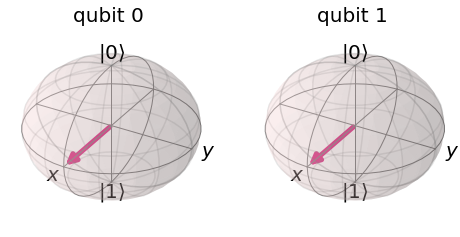

In [3]:
# Simulate > [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [4]:
# Measure > {'01': 1024}
circuit.measure(q, c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 248, '01': 261, '10': 271, '11': 244}


In [5]:
# Problem3-2, 7 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# |Φ+⟩ = CNOT⋅ H1(|00⟩)
circuit.h(q[0])
circuit.cx(q[0], q[1])

# |Φ−⟩ = X1⋅ CNOT⋅ H1(|00⟩)
#circuit.h(q[0])
#circuit.cx(q[0], q[1])
#circuit.z(q[0])

# |Ψ+⟩ = X2⋅ CNOT⋅ H1(|00⟩)
#circuit.h(q[0])
#circuit.cx(q[0], q[1])
#circuit.x(q[1])

# |Ψ−⟩ = Z1(|Ψ+⟩) = Z1⋅ X2⋅ CNOT⋅ H1(|00⟩)
#circuit.h(q[0])
#circuit.cx(q[0], q[1])
#circuit.z(q[0])
#circuit.x(q[1])

# Draw
circuit.draw()

┌───┐     
q4_0: ┤ H ├──■──
      └───┘┌─┴─┐
q4_1: ─────┤ X ├
           └───┘
c1: 2/══════════

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


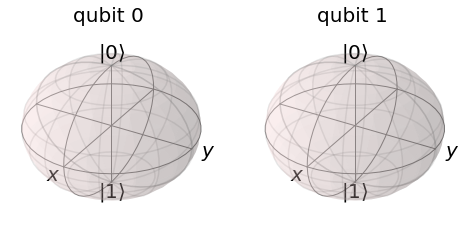

In [6]:
# Simulate > [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [7]:
# Measure > {'01': 1024}
circuit.measure(q, c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 496, '11': 528}


In [10]:
# Problem3-3, 4 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# |00> --> |00>
for i in range(2):
    if (i == 0):
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Original State: ", counts, '\n')
    if (i == 1):
        circuit.swap(q[0], q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Swap State: ", counts, '\n')

# check (q=1, CNOT rotate the other bit ; q=0, CNOT does not work)
#circuit.cx(q[0], q[1])
#circuit.cx(q[1], q[0])
#circuit.cx(q[0], q[1])

{'00': 1024}
Original State:  {'00': 1024} 

{'00': 1024}
Swap State:  {'00': 1024} 



In [11]:
# Problem3-3, 4 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# |01> --> |10>
for i in range(2):
    if (i == 0):
        circuit.x(q[0])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Original State: ", counts, '\n')
    if (i == 1):
        circuit.swap(q[0], q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Swap State: ", counts, '\n')

{'01': 1024}
Original State:  {'01': 1024} 

{'10': 1024}
Swap State:  {'10': 1024} 



In [12]:
# Problem3-3, 4 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# |10> --> |01>
for i in range(2):
    if (i == 0):
        circuit.x(q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Original State: ", counts, '\n')
    if (i == 1):
        circuit.swap(q[0], q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Swap State: ", counts, '\n')

{'10': 1024}
Original State:  {'10': 1024} 

{'01': 1024}
Swap State:  {'01': 1024} 



In [13]:
# Problem3-3, 4 %
# Import some libraries
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

# Create one qubits and one classical bits
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# |11> --> |11>
for i in range(2):
    if (i == 0):
        circuit.x(q[0])
        circuit.x(q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Original State: ", counts, '\n')
    if (i == 1):
        circuit.swap(q[0], q[1])
        circuit.measure(q, c)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circuit, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts()
        print(counts)
        print("Swap State: ", counts, '\n')

{'11': 1024}
Original State:  {'11': 1024} 

{'11': 1024}
Swap State:  {'11': 1024} 

